In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn import datasets
cmap = matplotlib.cm.get_cmap("Spectral")

In [4]:
iris_data = datasets.load_iris()
X,y = iris_data.data, iris_data.target
X[:6]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])

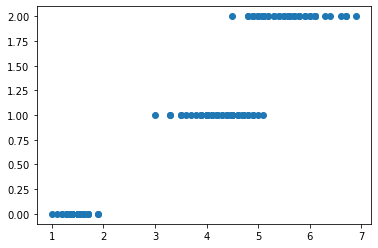

In [5]:
#quick view of our data distribution
plt.scatter(X[:,2], y)
plt.show()

Text(0, 0.5, 'Sepal width')

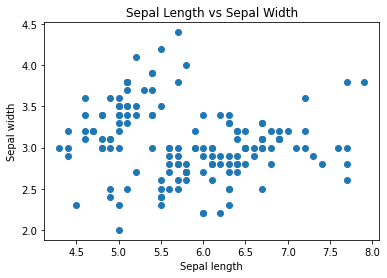

In [6]:
#comparison of two random columns
plt.scatter(X[:, 0], X[:,1])
plt.title("Sepal Length vs Sepal Width")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

In [7]:
distortion_values = list()
inertia_values = list()
K = range(1,10)
for k in K:
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(X)
    distortions = sum(np.min(cdist(X, kmeans_model.cluster_centers_, 'euclidean'), axis=1))/X.shape[0]
    distortion_values.append(distortions)
    inertia = kmeans_model.inertia_
    inertia_values.append(inertia)

C:\Users\AK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


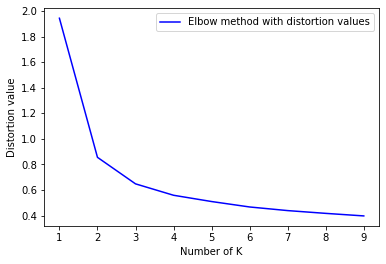

In [8]:
plt.plot(K, distortion_values, c='b', label="Elbow method with distortion values")
plt.ylabel("Distortion value")
plt.xlabel("Number of K")
plt.legend()

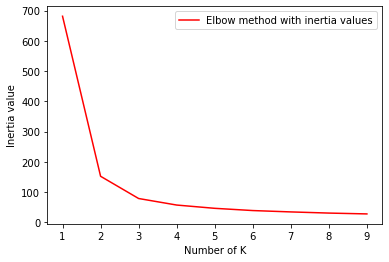

In [9]:
plt.plot(K, inertia_values, c="r", label="Elbow method with inertia values")
plt.ylabel("Inertia value")
plt.xlabel("Number of K")
plt.legend()

In [10]:
km_model = KMeans(n_clusters=3)
km_model.fit(X)
clusters = km_model.predict(X)

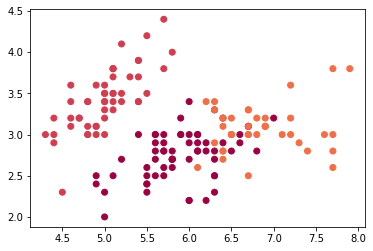

In [11]:
plt.scatter(X[:,0],X[:,1], c=[cmap(float(i) /10) for i in clusters]);